In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [11]:
x,y=make_regression(n_samples=1000,n_features=3,noise=10)
df=pd.DataFrame(x)
df["Target"]=pd.DataFrame(y)
x.shape,y.shape

((1000, 3), (1000,))

In [3]:
dff=df.rename(columns={0:"A",
                      1:"B",
                      2:"C"})
dff

,A,B,C,Target
0,-0.248322,0.570537,-1.214334,-31.010024
1,1.442374,-0.038439,-1.215977,-39.854110
2,-1.311322,-0.655507,0.006026,-112.644230
3,-1.167182,1.296584,-0.019880,59.442577
4,0.431051,-2.363683,-1.162613,-274.028060
...,...,...,...,...
995,0.737077,2.245393,0.076781,256.069001
996,-0.068650,0.194492,0.287283,39.850808
997,0.850061,-0.043840,0.007744,35.109131
998,0.871293,-0.888737,2.613649,127.087934


(1000, 3)
(1000, 1)


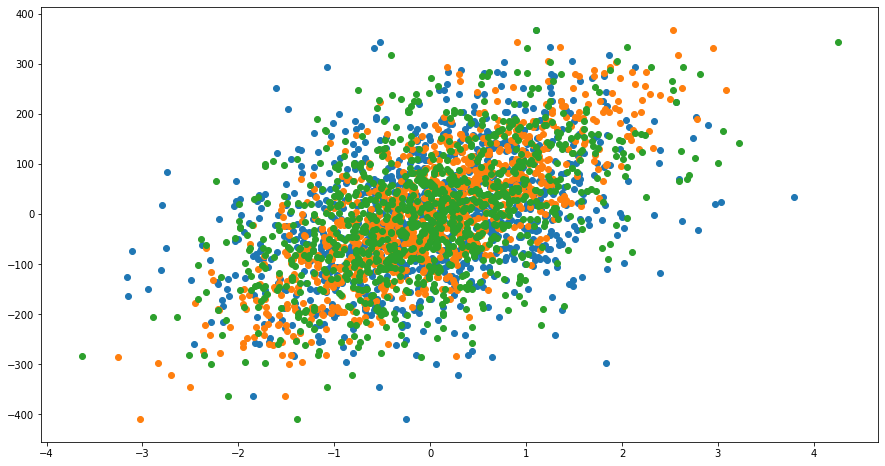

In [4]:
pl.figure(figsize=(15,8))
for i in range(3):
    pl.scatter(dff.iloc[:,i],dff["Target"])
print(x.shape)
y=y.reshape(-1,1)
print(y.shape)

In [5]:
m=np.zeros(3).reshape(-1,1)
c=0
L=0.01
reps=1000
n=1000
error=[]
d_m=[0,0,0]
d_c=0
for i in range(reps):
    y_pred=np.dot(x,m)+c
    d_m=(-2/n)*np.sum((y-y_pred)*x,axis=0).reshape(-1,1)
    d_c=(-2/n)*sum(y-y_pred)
    m=m-L*d_m
    c=c-L*d_c
    er=np.mean(np.square(y-y_pred))
    error.append(er)
print(m,c)

[[43.07527107]
 [96.71210986]
 [66.89568889]] [-0.23143366]


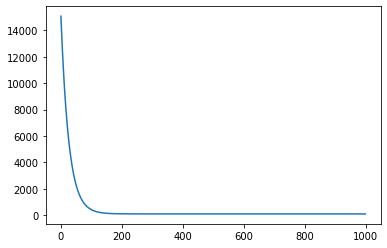

In [6]:
pl.plot(error)

C:\Users\RINSU\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 1080x576 with 0 Axes>

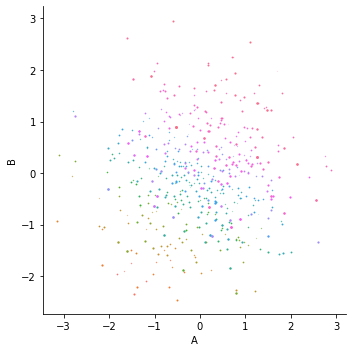

In [7]:
import seaborn as sns
x1=dff["A"]
x2=dff["B"]
x3=dff["C"]
y=dff["Target"]
y_p1=m[0]*x1.values+c
y_p2=m[1]*x2.values+c
y_p3=m[2]*x3.values+c
pl.figure(figsize=(15,8))
sns.FacetGrid(dff,hue="Target",height=5)\
        .map(pl.scatter,"A","B","C")


In [8]:
y_p1=y_p1.reshape(-1,1)
y_p2=y_p2.reshape(-1,1)
y_p3=y_p3.reshape(-1,1)


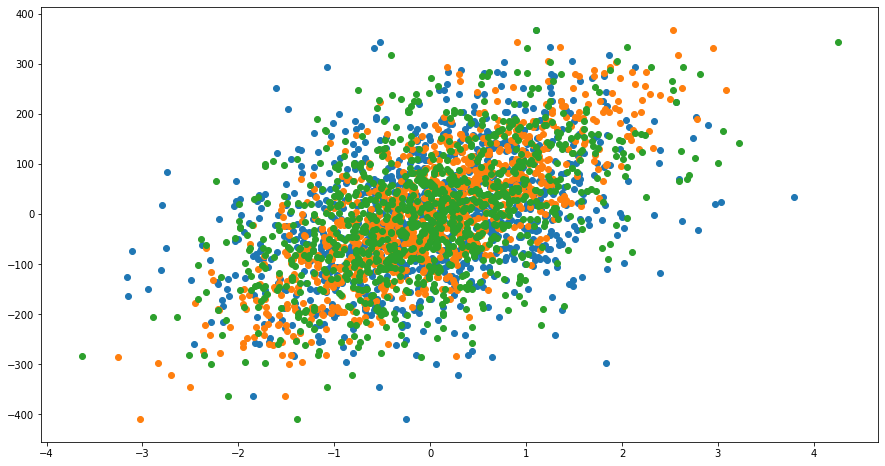

In [9]:
pl.figure(figsize=(15,8))
for i in range(3):
    pl.scatter(dff.iloc[:,i],dff["Target"])
